<img src="ipl.PNG">


Table of Contents

•1.Problem Statement 

◾1.1 Introduction

◾1.2 Data source and data set

•2.Load the packages and data

•3.Data profiling 

◾3.1 dtypes

◾3.2 head

◾3.3 Info

◾3.4 Shape

◾3.5 describe

◾3.6 sample

◾3.7 Pandas profiling

◾3.8 Initial observations


•4.Data normalization 

◾4.1 Drop dulplicate data

◾4.2 Correct spelling mistakes in Team names

◾4.3 Handling NaN data in categorical variables

◾4.4 Grouping


•5.Identify patterns in the data 

Bowlers Statistics
◾5.1 Find the top 10 bowlers who bowled max overs
◾5.2 Find the best bowler with maximum wickets vs number of matches played.
◾5.3 Plot top bowlers with highest bowling average
◾5.4 Find the top wicket takers in first 6 overs
◾5.5 Find the top wicket takers in last 5 overs

Batting Statistics
◾5.6 Find the top 10 batsman with highest score and matches played
◾5.7 Find top 5 partnerships in IPL
◾5.8 Find the player most inolved in run outs

Team Statistics
◾5.9 Team's winning stats in all IPLs
◾5.10 All teams winning trend batting first vs chasing
◾5.12 Identify the correlation between overs and runs scored
◾5.13 Runs scored (min, max and median)in last 5 overs

•6. Hypothesis
◾ Hypothesis1 : Team batting first scoring >95runs in first 10 overs has high probability of winning matches.
◾ Hypothesis2 : Extra runs given by Fielding team is inversely proportional to Win.

•7.Conclusion



                                        Indian Premier League¶

The Indian Premier League (IPL), officially Vivo Indian Premier League for sponsorship reasons, is a professional Twenty20 cricket league in India contested during April and May of every year by teams representing Indian cities and some states.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008, and is regarded as the brainchild of Lalit Modi, the founder and former commissioner of the league. IPL has an exclusive window in ICC Future Tours Programme.

Current teams
    - Chennai Super Kings
    - Delhi Capitals
    - Kings XI Punjab
    - Kolkata Knight Riders
    - Mumbai Indians
    - Rajasthan Royals
    - Royal Challengers Bangalore
    - Sunrisers Hyderabad
Former teams
    - Deccan Chargers
    - Gujarat Lions
    - Kochi Tuskers Kerala
    - Pune Warriors India 
    - Rising Pune Supergiant

    
Exploratory data analysis (EDA) is an approach to analyze data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task

With this Exploratory Data Analytics on IPL, we have tried to explore IPL data on three dimension bowling, batting and team performance. provide observations with each step in order to explain thoroughly how did I approach the data set. Based on the observation some questions also are answered in the notebook for the reference.
 

1.2. Data source and dataset

The data has been picked up from github. We don't have official information about the data collection method, but it appears not to be a random sample, so we can assume that it is not representative.



In [3]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output


In [7]:
#Brought the data in csv file to local and loaded into dataframe.
ipl_deliveries = pd.read_csv("deliveries.csv",sep=',')


Data Profiling
•In the upcoming sections we will first understand our dataset using various pandas functionalities.
•Then with the help of pandas profiling we will find which columns of our dataset need preprocessing.
•In preprocessing we will deal with erronous and missing values of columns. 
•Again we will do pandas profiling to see how preprocessing have transformed our dataset.



In [3]:
# Get first few records of data frame
ipl_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
#Get data schema details
ipl_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
match_id            164750 non-null int64
inning              164750 non-null int64
batting_team        164750 non-null object
bowling_team        164750 non-null object
over                164750 non-null int64
ball                164750 non-null int64
batsman             164750 non-null object
non_striker         164750 non-null object
bowler              164750 non-null object
is_super_over       164750 non-null int64
wide_runs           164750 non-null int64
bye_runs            164750 non-null int64
legbye_runs         164750 non-null int64
noball_runs         164750 non-null int64
penalty_runs        164750 non-null int64
batsman_runs        164750 non-null int64
extra_runs          164750 non-null int64
total_runs          164750 non-null int64
player_dismissed    8157 non-null object
dismissal_kind      8157 non-null object
fielder             5918 non-null object
dtype

In [5]:
#Get data dimensions
ipl_deliveries.shape

(164750, 21)

In [6]:
# Describe the data to understand it more.
ipl_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000
mean,977.951757,1.482307,10.151879,3.616243,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129
std,2147.671843,0.501592,5.675666,1.807398,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,521.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,7953.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [7]:
#Generate a profile report to explore data set
pre_profile= pandas_profiling.ProfileReport(ipl_deliveries)
pre_profile.to_file(outputfile="ipl_deliveries-pre-profile.html")

Observation
Profiling the data shows the data has 21 observations and 164750 observations.
There are 13 numeric and 8 object type variables.
Below variables have high level of Null values:
- player_dismissed    
- dismissal_kind
- fielder

There is a team with little difference in spelling. Replacing 'Rising Pune Supergiant' with 'Rising Pune Supergiants'.

In [10]:
#Remove 5 dulplicate records
print(ipl_deliveries.count)
ipl_deliveries.drop_duplicates(subset=None, keep='first', inplace=True)
print(ipl_deliveries.count)

<bound method DataFrame.count of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
5              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
6              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
7              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
8              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
9              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
10             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
11             1       1  Sunri

<bound method DataFrame.count of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
5              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
6              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
7              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
8              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
9              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
10             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
11             1       1  Sunri

In [9]:
# Replace Rising Pune Supergiant with Rising Pune Supergiants
ipl_deliveries['batting_team'].replace(to_replace=["Rising Pune Supergiant"],value='Rising Pune Supergiants',inplace=True)
ipl_deliveries['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [11]:
#Generate a profile report to explore data set
post_profile= pandas_profiling.ProfileReport(ipl_deliveries)
post_profile.to_file(outputfile="ipl_deliveries-post-profile.html")


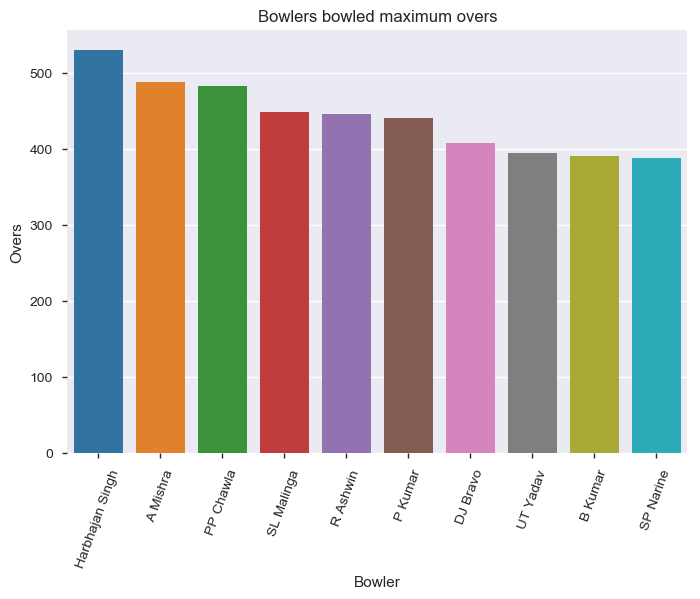

In [10]:
# Find the top 10 bowlers who bowled max overs
best_bwlr = ipl_deliveries.groupby(by=['bowler']).size().reset_index(name= 'counts')
best_bwlr['overs'] = (best_bwlr['counts']/6).round()
exp_bwlr = best_bwlr.sort_values(['overs'], ascending=False).head(10)
#Plot bar chart
sns.barplot(x = "bowler", y = "overs",  data = exp_bwlr)
plt.ylabel('Overs')
plt.xlabel('Bowler')
plt.title('Bowlers bowled maximum overs')
plt.xticks(rotation=70)
plt.show()

Harbhajan Singh has bowled maximum number of overs at 530 which is way ahead of Amit at 488 and Piyush at 482.

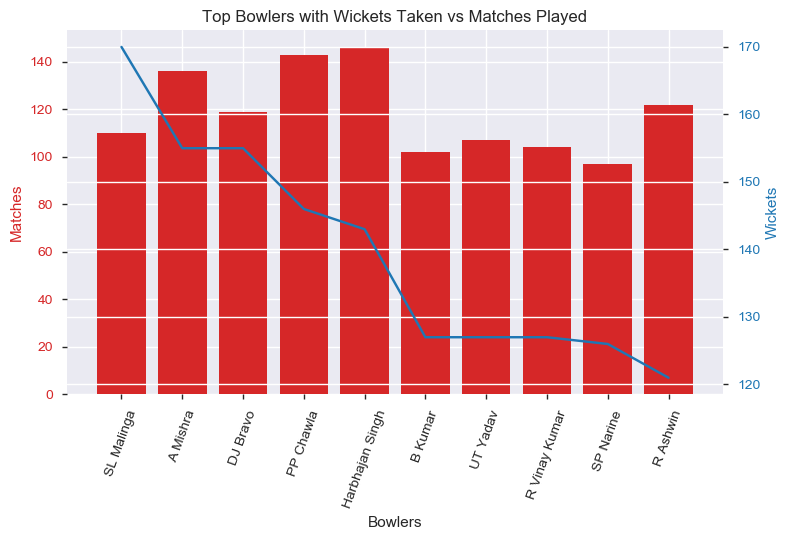

In [11]:
#Find the best bowler with maximum wickets vs number of matches played.
best_bwlr = ipl_deliveries.loc[(ipl_deliveries['player_dismissed'].notnull()) & (ipl_deliveries['dismissal_kind'].notnull()) & (ipl_deliveries['dismissal_kind']!='runout')].groupby(by=['bowler']).size().rename('wickets').reset_index() #.agg({'player_dismissed':'sum'})#.rename('wickets')
bb= best_bwlr.sort_values(['wickets'], ascending=False).head(10)
bwlr_matches = ipl_deliveries.groupby(by=['bowler']).match_id.nunique().reset_index(name= 'matches')
result = bb.merge(bwlr_matches,on='bowler')
result['avg']= np.round(result['wickets']/result['matches'],2)
#print(result)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Bowlers')
ax1.set_ylabel('Matches', color=color)
ax1.bar(result['bowler'], result['matches'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x',rotation=70)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Wickets', color=color)  # we already handled the x-label with ax1
ax2.plot(result['bowler'], result['wickets'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Top Bowlers with Wickets Taken vs Matches Played')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Harbhajan, Piyush and Amit have played 146,143 and 136 matches respectively.
Malinga has taken 170 wickets followed by Amit and Bravo at 155 each.


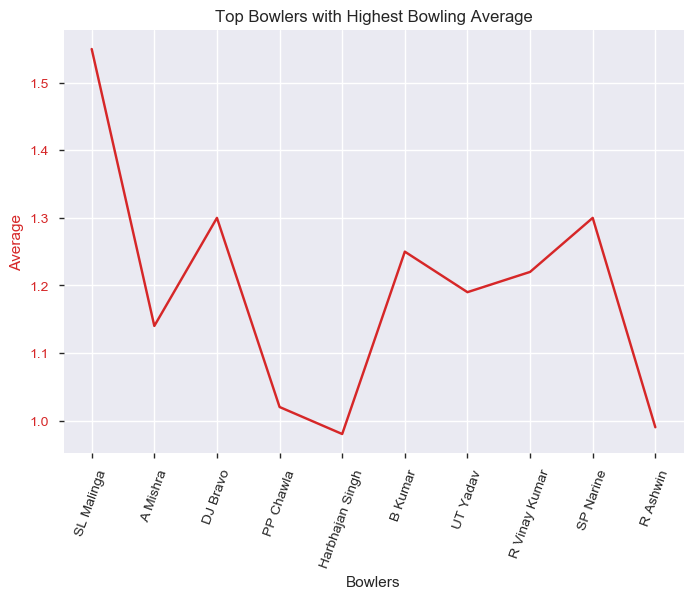

In [12]:
#Plot top bowlers with highest bowling average
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Bowlers')
ax1.set_ylabel('Average', color=color)
ax1.plot(result['bowler'], result['avg'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x',rotation=70)
plt.title('Top Bowlers with Highest Bowling Average')
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.show()

Malinga has the best average of 1.55 followed by Bravo and Narine at 1.3 and B Kumar at 1.25.

           bowler  wickets  matches
0          Z Khan       35       99
1     DS Kulkarni       31       80
2         P Kumar       29      119
3        M Morkel       28       70
4  Sandeep Sharma       27       68
5        UT Yadav       27      107
6       SR Watson       27      105
7         A Nehra       26       88
8         B Kumar       25      102
9  MJ McClenaghan       24       51


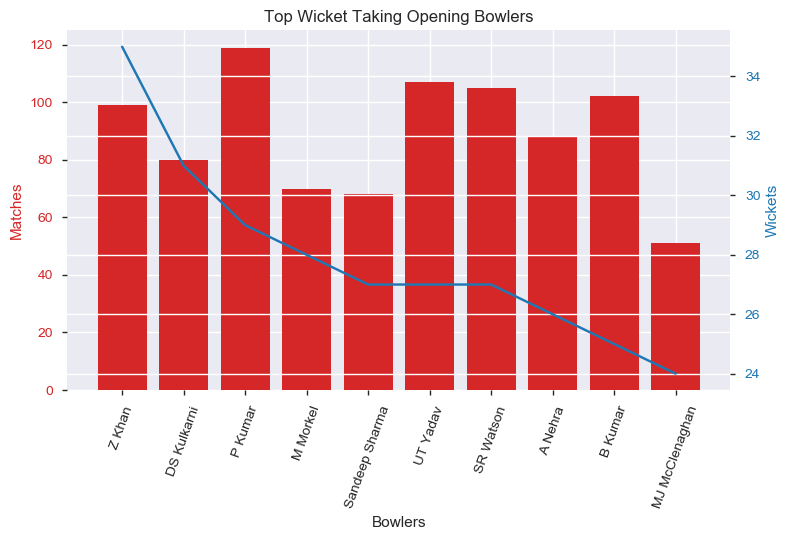

In [13]:
# Find the top wicket takers in first 6 overs
#bb_6overs = ipl_deliveries[[ipl_deliveries['dismissal_kind']!='run out' & ipl_deliveries['over']<=6]]
bb = ipl_deliveries[(ipl_deliveries['over']<=6) &(ipl_deliveries['dismissal_kind']!='run out')]
bb = bb.dropna()
bb_6overs = bb.groupby(by='bowler').size().reset_index(name='wickets')
bwlr_matches = ipl_deliveries.groupby(by=['bowler']).match_id.nunique().reset_index(name= 'matches')
bb_6overs= bb_6overs.sort_values(['wickets'], ascending=False).head(10)
result = bb_6overs.merge(bwlr_matches,on='bowler')
print(result)
#Plot bowlers against matches played and wickets taken
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Bowlers')
ax1.set_ylabel('Matches', color=color)
ax1.bar(result['bowler'], result['matches'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x',rotation=70)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Wickets', color=color)  # we already handled the x-label with ax1
ax2.plot(result['bowler'], result['wickets'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Top Wicket Taking Opening Bowlers')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


Bowlers above in the graph are are the 10 best opening bowlers.
Zahir Khan has been the leading wicket taker in first 6 overs with 35 wickets in 99 matches.
He is followed by Kulkarni with 31 wickets in 80 matches.

          bowler  wickets  matches
0       DJ Bravo       60      119
1     SL Malinga       46      110
2        B Kumar       45      102
3        A Nehra       39       88
4  R Vinay Kumar       37      104
5      SP Narine       35       97
6       UT Yadav       34      107
7       DW Steyn       31       90
8      SR Watson       31      105
9      MM Sharma       29       84


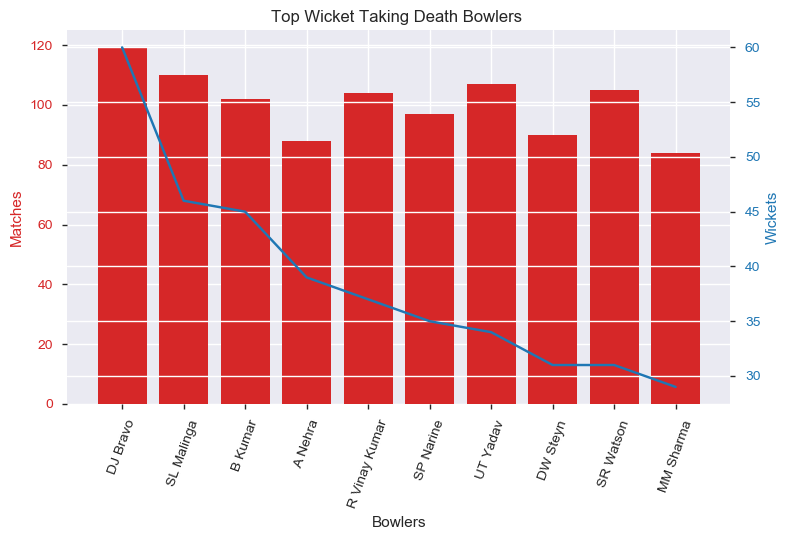

In [14]:
# Find the top wicket takers in last 5 overs
bb = ipl_deliveries[(ipl_deliveries['over']>=16) &(ipl_deliveries['dismissal_kind']!='run out')]
bb = bb.dropna()
bb_dovers = bb.groupby(by='bowler').size().reset_index(name='wickets')
bwlr_matches = ipl_deliveries.groupby(by=['bowler']).match_id.nunique().reset_index(name= 'matches')
bb_dovers= bb_dovers.sort_values(['wickets'], ascending=False).head(10)
result = bb_dovers.merge(bwlr_matches,on='bowler')

#Plot bowlers against matches played and wickets taken
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Bowlers')
ax1.set_ylabel('Matches', color=color)
ax1.bar(result['bowler'], result['matches'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x',rotation=70)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Wickets', color=color)  # we already handled the x-label with ax1
ax2.plot(result['bowler'], result['wickets'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Top Wicket Taking Death Bowlers ')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


Bowlers above are best death overs bowlers.
Bravo leading the chart at 60 wickets in 119 matches followed by Malinga and B Kumar.
Umesh Yadav, Watson, Nehra, B Kumar have been leading wickets takers in both opening and death overs.


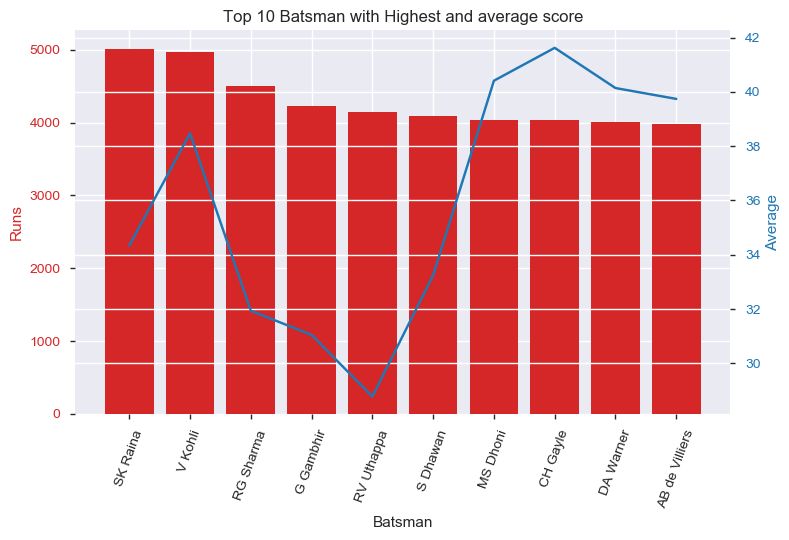

In [15]:
# Find the top 10 batsman with highest score and matches played
batsman = ipl_deliveries.groupby(by=['batsman']).agg({'batsman_runs':'sum','match_id':'nunique'})#.reset_index(name='Runs')--.match_id.nunique().reset_index(name= 'matches')
batsman.sort_values(by='batsman_runs',ascending=False, inplace=True)
batsman_top = batsman.head(10).reset_index()
batsman_dismissed = ipl_deliveries.groupby(by='player_dismissed').size().reset_index(name='count')
batsman_avg = batsman_top.merge(batsman_dismissed,how= 'left',left_on='batsman',right_on='player_dismissed')
batsman_avg['average']= (batsman_avg['batsman_runs']/batsman_avg['count']).round(2)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Batsman')
ax1.set_ylabel('Runs', color=color)
ax1.bar(batsman_avg['batsman'], batsman_avg['batsman_runs'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x',rotation=70)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average', color=color)  # we already handled the x-label with ax1
ax2.plot(batsman_avg['batsman'], batsman_avg['average'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Top 10 Batsman with Highest and average score')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


Raina is leading run getter with over 5K runs in 172 matches followed by Kohli and Rohit.
The players with highest batting average are Gayle, Dhoni, Warner and AB De Villers. They are very consistent and dependable batsman.

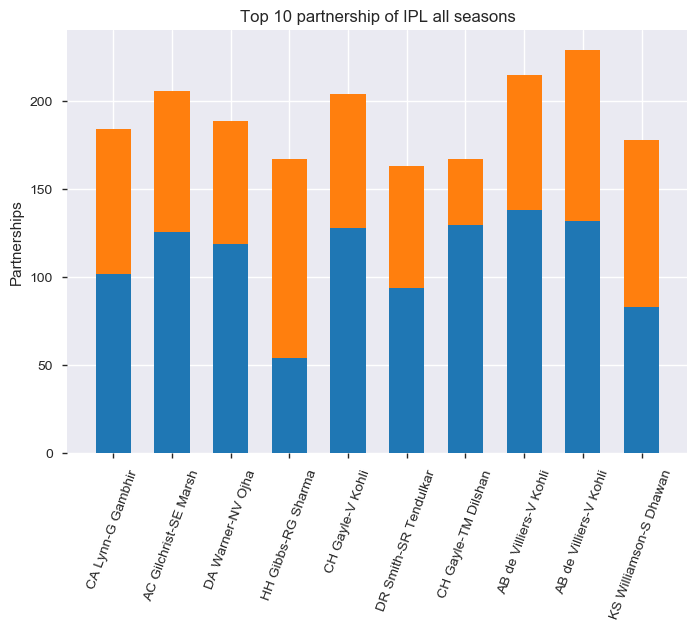

,match_id,partners,runs,batsman_x,non_striker_x,total_runs_x,non_striker_y,batsman_y,total_runs_y,_merge,bat1_runs,bat2_runs
0,3,CA Lynn-G Gambhir,184,G Gambhir,CA Lynn,82,G Gambhir,CA Lynn,102,both,102,82
1,296,AC Gilchrist-SE Marsh,206,SE Marsh,AC Gilchrist,80,SE Marsh,AC Gilchrist,126,both,126,80
2,331,DA Warner-NV Ojha,189,DA Warner,NV Ojha,119,DA Warner,NV Ojha,70,both,119,70
3,363,HH Gibbs-RG Sharma,167,RG Sharma,HH Gibbs,113,RG Sharma,HH Gibbs,54,both,54,113
4,372,CH Gayle-V Kohli,204,CH Gayle,V Kohli,128,CH Gayle,V Kohli,76,both,128,76
5,377,DR Smith-SR Tendulkar,163,DR Smith,SR Tendulkar,94,DR Smith,SR Tendulkar,69,both,94,69
6,411,CH Gayle-TM Dilshan,167,TM Dilshan,CH Gayle,37,TM Dilshan,CH Gayle,130,both,130,37
7,562,AB de Villiers-V Kohli,215,V Kohli,AB de Villiers,77,V Kohli,AB de Villiers,138,both,138,77
8,620,AB de Villiers-V Kohli,229,AB de Villiers,V Kohli,132,AB de Villiers,V Kohli,97,both,132,97
9,7935,KS Williamson-S Dhawan,178,KS Williamson,S Dhawan,83,KS Williamson,S Dhawan,95,both,83,95


In [16]:
# Find top 5 partnerships in IPL
part1 = ipl_deliveries.groupby(by=['match_id','batsman','non_striker']).agg({'total_runs':'sum'}).reset_index()
part2 = ipl_deliveries.groupby(by=['match_id','non_striker','batsman']).agg({'total_runs':'sum'}).reset_index()
partnership= part1.merge(part2,how='inner',left_on=['match_id','batsman','non_striker'], right_on=['match_id','non_striker','batsman'],indicator=True)
partnership['runs']=partnership['total_runs_x']+partnership['total_runs_y']
partnership.sort_values(by='runs',ascending=False, inplace=True)
partnership_head = partnership.head(20)

def update_runs(x):
    if (x['batsman_x']< x['non_striker_x']):
        x['partners']= x['batsman_x']+'-' + x['non_striker_x']
        x['bat1_runs']= x['total_runs_x']
        x['bat2_runs']= x['total_runs_y']
    else:
        x['partners']= x['non_striker_x']+'-' + x['batsman_x']
        x['bat1_runs']= x['total_runs_y']
        x['bat2_runs']= x['total_runs_x']
    return x

partnership_head= partnership_head.apply(lambda x : update_runs(x), axis=1)

partnership_head_grp = partnership_head.groupby(by=['match_id','partners','runs']).first().reset_index()
partnership_head_grp
# CREATE GRAPH
width = 0.60
p1 = plt.bar(partnership_head_grp.index, partnership_head_grp['bat1_runs'],width)
p2 = plt.bar(partnership_head_grp.index, partnership_head_grp['bat2_runs'],width,bottom=partnership_head_grp['bat1_runs'])

plt.ylabel('Partnerships')
plt.title('Top 10 partnership of IPL all seasons')
plt.xticks(partnership_head_grp.index, partnership_head_grp['partners'],rotation=70)

plt.show()
partnership_head_grp

Here is the graph depicting the biggest partnership of all times in IPL.AB and Kohli had a top two biggest partnership of 229 and 215 runs followed by a partnership of 206 runs between Gilchrist and Marsh.
Kohli featured in 3 of the top 4 partnerships. AB and Gayle were part of two partnerships each in top 10.

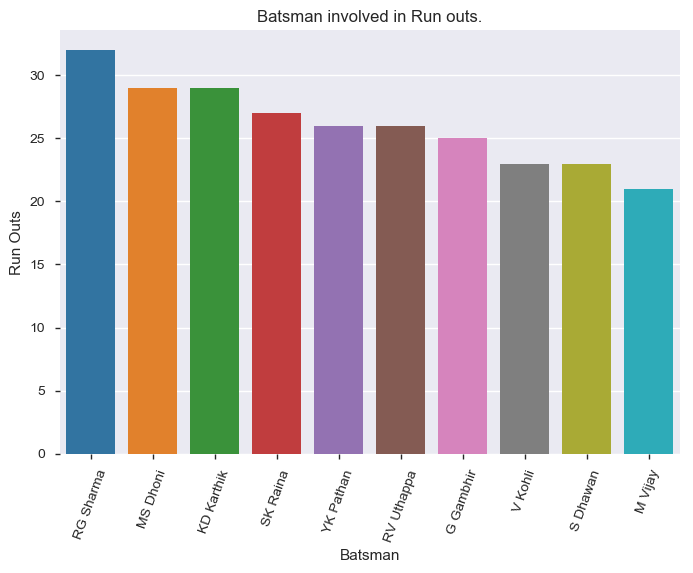

In [17]:
#Find the player most inolved in run outs
runout = ipl_deliveries[['batsman', 'non_striker']][ipl_deliveries['dismissal_kind']=='run out']
runout.columns = runout.columns.str.replace('.*?non_striker','batsman')
runo= runout.stack()
df_runo = runo.to_frame(name='batsman')
df_result = df_runo.groupby(by='batsman').size().reset_index(name='count')
df_result.sort_values(by='count', ascending=False, inplace=True)
df_result = df_result.head(10)
sns.barplot(x = "batsman", y = "count",  data = df_result)
plt.ylabel('Run Outs')
plt.xlabel('Batsman')
plt.title('Batsman involved in Run outs.')
plt.xticks(rotation=70)
plt.show()


Rohit, Dhoni, Karthik and Raina have been involved in runouts most number of times.
Players featuring in the list need to work on their running between the wickets and other batsman have to be aware of the goof up these players have been part of, so as to be careful while sharing the pitch with them.


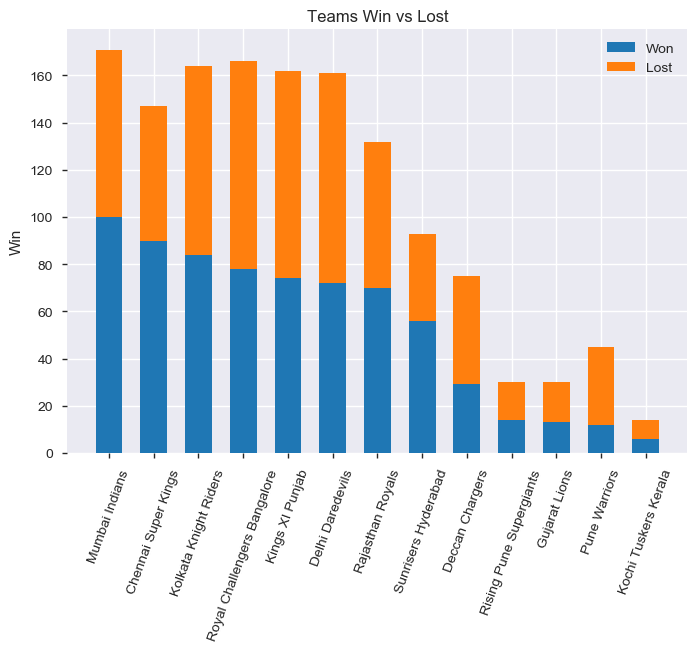

In [18]:
#Team's winning stats in all IPLs
match_teams = ipl_deliveries.groupby(by=['match_id', 'inning','batting_team']).agg({'total_runs': 'sum'}).reset_index()
max_score = match_teams.groupby(by=['match_id']).agg({'total_runs':'max'})
max_score
m_t =match_teams.merge(max_score, how='inner', on=['match_id'],indicator=False)
#match_teams

m_t['winner']= m_t.apply(lambda x : 1 if x['total_runs_x']>=x['total_runs_y'] else 0, axis =1)
m_t_super = m_t[(m_t['inning']>=3)]
m_t_superscore = m_t_super.groupby(by='match_id').agg({'total_runs_x':'max'})

m_t_sup =m_t_super.merge(m_t_superscore, how='inner', on=['match_id'],indicator=False)
m_t_sup['winner']= m_t_sup.apply(lambda x : 1 if x['total_runs_x_x']>=x['total_runs_x_y'] else 0, axis =1)
m_t_sup_ss = m_t_sup[['match_id','batting_team','inning','winner']]

m_t_supres =m_t.merge(m_t_sup_ss, how='left', on=['match_id','batting_team'],indicator=False)
m_t_supres['winner_x'] = m_t_supres.apply(lambda x: 0 if x['winner_y']==0 else x['winner_x'], axis =1)
m_t_supres.head(80)

team_wins= m_t_supres.groupby(by='batting_team').agg({'winner_x':'sum'})
team_wins_sorted= team_wins.sort_values(['winner_x'], ascending=False)
team_wins_sorted

#find the total matches played by team
matches_played = m_t_supres[m_t_supres['inning_x']<=2].groupby('batting_team').size().reset_index(name='total')
matches_played

#find the total matches lost by team
matches_lost = m_t_supres[(m_t_supres['inning_x']<=2) & (m_t_supres['winner_x']==0)].groupby('batting_team').size().reset_index(name='lost')
matches_lost

win_match =team_wins_sorted.merge(matches_played,how='left',on='batting_team')
win_lost_played =win_match.merge(matches_lost,how='left',on='batting_team')
win_lost_played
# CREATE GRAPH
width = 0.60
p1 = plt.bar(win_lost_played['batting_team'], win_lost_played['winner_x'],width) #, width, yerr=menStd)
p2 = plt.bar(win_lost_played['batting_team'], win_lost_played['lost'],width,
             bottom=win_lost_played['winner_x']) #, yerr=womenStd)

plt.ylabel('Win')
plt.title('Teams Win vs Lost')
plt.xticks(win_lost_played['batting_team'],rotation=70)
plt.legend((p1[0], p2[0]), ('Won', 'Lost'))

plt.show()


Mumbai Indian has won 100 matches out of 164 played followed by CSK and KKR. But winning percentage of CSK is 61% which is better than MI winning percent of 58%.
SRH also has 60% winning percent but they have played less number of matches.

In [19]:
# All Teams winning trend batting first vs chasing
#m_t_supres
m_t_1winner = m_t_supres[(m_t_supres['inning_x']==1) & (m_t_supres['winner_x']==1)].groupby(by='batting_team').size().reset_index(name='1_winner')
m_t_2winner = m_t_supres[(m_t_supres['inning_x']==2) & (m_t_supres['winner_x']==1)].groupby(by='batting_team').size().reset_index(name='2_winner')
m_t_1looser = m_t_supres[(m_t_supres['inning_x']==1) & (m_t_supres['winner_x']==0)].groupby(by='batting_team').size().reset_index(name='1_looser')
m_t_2looser = m_t_supres[(m_t_supres['inning_x']==2) & (m_t_supres['winner_x']==0)].groupby(by='batting_team').size().reset_index(name='2_looser')

m_t_result = m_t_1winner.merge(m_t_2winner, how='inner',on='batting_team').merge(m_t_1looser, how='inner',on='batting_team').merge(m_t_2looser, how='inner',on='batting_team')
m_t_result['1_total'] = m_t_result.apply(lambda x : x['1_winner']+x['1_looser'], axis=1)
m_t_result['2_total'] = m_t_result.apply(lambda x : x['2_winner']+x['2_looser'], axis=1)
m_t_result

,batting_team,1_winner,2_winner,1_looser,2_looser,1_total,2_total
0,Chennai Super Kings,50,40,33,24,83,64
1,Deccan Chargers,18,11,25,21,43,32
2,Delhi Daredevils,32,40,40,49,72,89
3,Gujarat Lions,1,12,13,4,14,16
4,Kings XI Punjab,37,37,47,41,84,78
5,Kochi Tuskers Kerala,2,4,5,3,7,7
6,Kolkata Knight Riders,35,49,39,41,74,90
7,Mumbai Indians,53,47,38,33,91,80
8,Pune Warriors,6,6,14,19,20,25
9,Rajasthan Royals,30,40,32,30,62,70


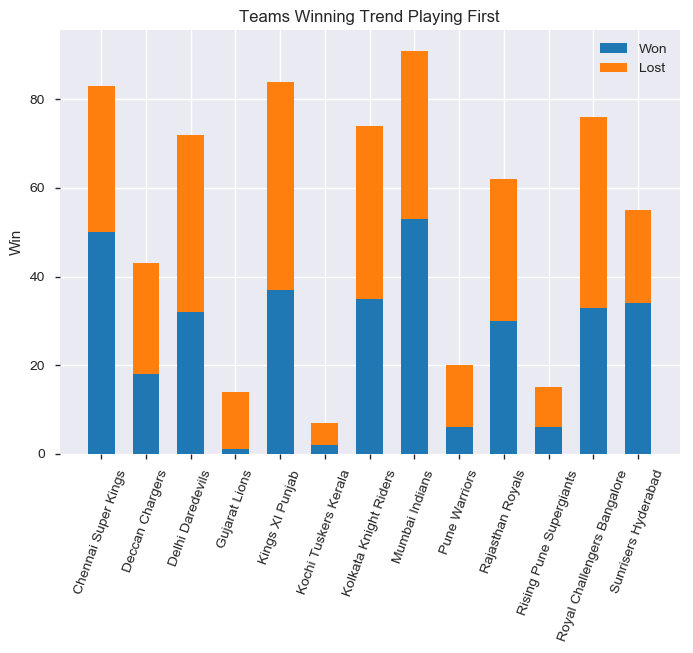

In [20]:
# CREATE GRAPH to show Teams winning trend batting first
width = 0.60
p1 = plt.bar(m_t_result['batting_team'], m_t_result['1_winner'],width) #, width, yerr=menStd)
p2 = plt.bar(m_t_result['batting_team'], m_t_result['1_looser'],width,
             bottom=m_t_result['1_winner']) #, yerr=womenStd)

plt.ylabel('Win')
plt.title('Teams Winning Trend Playing First')
plt.xticks(m_t_result['batting_team'],rotation=70)
plt.legend((p1[0], p2[0]), ('Won', 'Lost'))

plt.show()

Below are the teams who are better setting targets:
    - CSK
    - SRH
    - DCH   
    - PW   

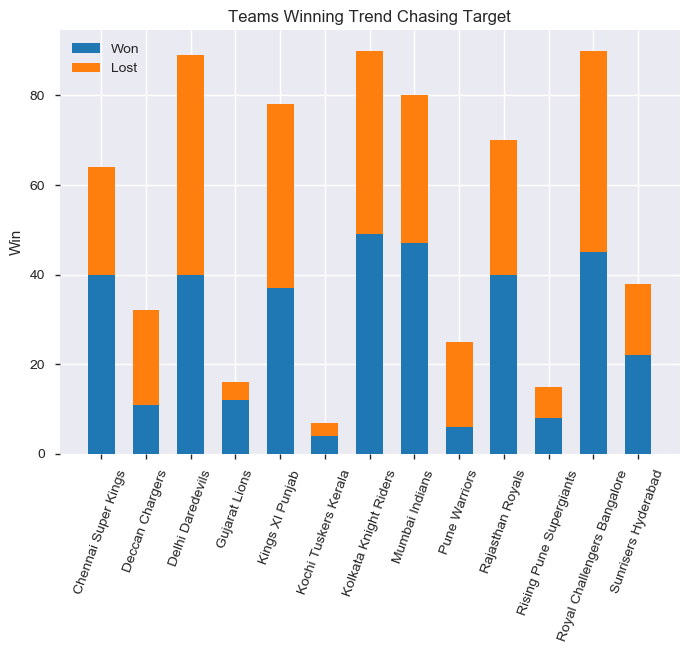

In [21]:
# CREATE GRAPH to show Teams winning trend chasing targets
width = 0.60
p1 = plt.bar(m_t_result['batting_team'], m_t_result['2_winner'],width)
p2 = plt.bar(m_t_result['batting_team'], m_t_result['2_looser'],width,
             bottom=m_t_result['2_winner']) 

plt.ylabel('Win')
plt.title('Teams Winning Trend Chasing Target')
plt.xticks(m_t_result['batting_team'],rotation=70)

plt.legend((p1[0], p2[0]), ('Won', 'Lost'))

plt.show()

Below are the teams better at chasing targets:
    - RR
    - KTK
    - KKR
    - RPS
    - RCB
    - KXIP
Below teams have equal winning percentage batting first and batting second:
    - MI
    - GL
    - DD

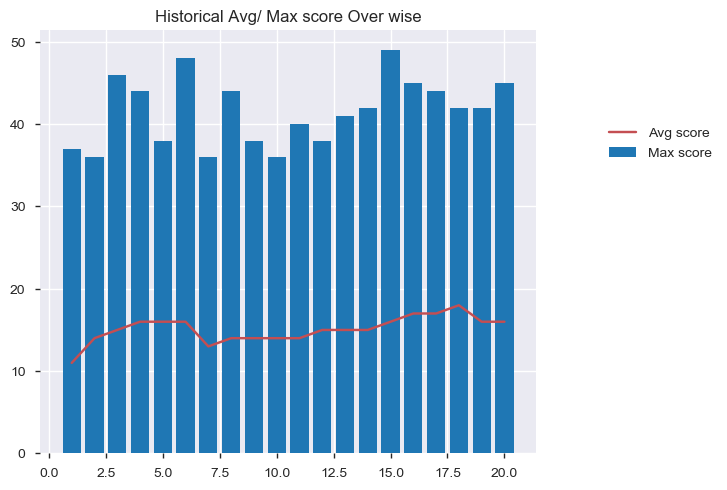

In [22]:
#Identify the correlation between overs and runs scored
## Runs scored (max and median)in each over

ipl_del = ipl_deliveries.loc[(ipl_deliveries['inning']==1) | (ipl_deliveries['inning']==2)]
match_score = ipl_del.groupby(by=['over','match_id']).agg({'total_runs':'sum'}).reset_index()
over_avg = match_score.groupby(by='over').agg({'total_runs':['median','min', 'max']}).reset_index()
over_avg.columns=["_".join(x) for x in over_avg.columns.ravel()]
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(over_avg['over_'], over_avg['total_runs_max'],label='Max score')
ax.plot(over_avg['over_'], over_avg['total_runs_median'],'r-',label='Avg score')
plt.title('Historical Avg/ Max score Over wise')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.8, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)
plt.show()

This graph shows the maximum and average runs scored in each overs in all IPL matches. The max runs scored in a over is 49 followed by 48 and 46 runs. 
Most of the runs are scored in last overs. The average runs scored in last 5 overs is relatively higher than other overs. It is also observed that more runs are scored in 4th, 5th and 6th over as the field restrictions are still on and batsman is set after playing first three overs.

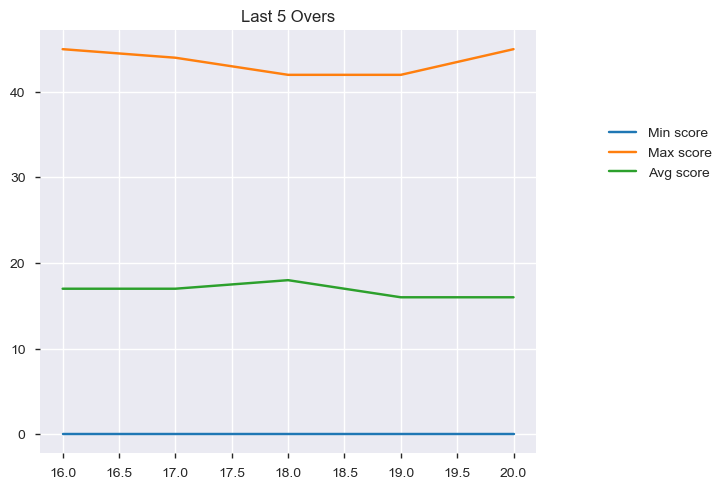

In [23]:
# Runs scored (min, max and median)in last 5 overs
avg_last5 = over_avg.loc[over_avg['over_']>15]
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(avg_last5['over_'], avg_last5['total_runs_min'],label='Min score')
ax.plot(avg_last5['over_'], avg_last5['total_runs_max'],label='Max score')
ax.plot(avg_last5['over_'], avg_last5['total_runs_median'],label='Avg score')
plt.title('Last 5 Overs')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.8, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)
plt.show()


The graph shows that average score in last five overs average around 18 runs with a little plateau in 18th over. There have been times when 0 runs were scored in death overs and at times more than 40 runs were scored.

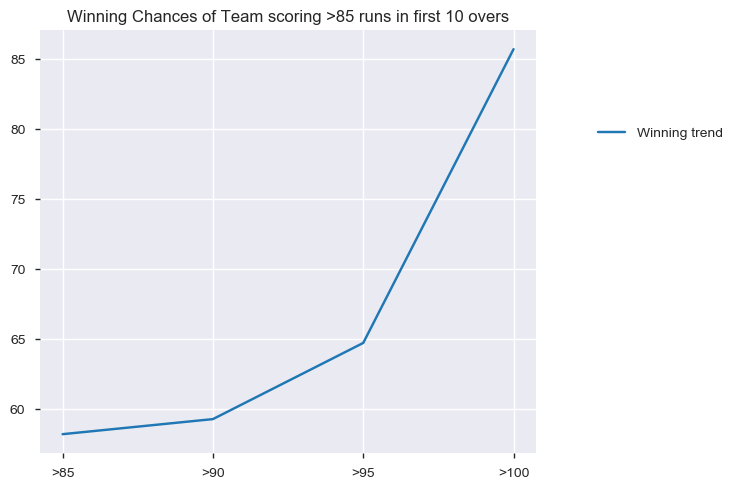

In [24]:
# Hypothesis : Team batting first scoring >95runs in first 10 overs has high probability of winning matches.
m_t_supres
ipl_del = ipl_deliveries.loc[(ipl_deliveries['inning']==1) & (ipl_deliveries['over']<=10)]
match_teams = ipl_del.groupby(by=['match_id']).agg({'total_runs': 'sum'}).reset_index()
match_teams.head(10)
winner = match_teams.merge(m_t_supres, how='left',on='match_id')
rs_winner_85 = winner.loc[(winner['total_runs']>85) & (winner['total_runs']<90) & (winner['inning_x']==1), (['match_id','batting_team','total_runs','winner_x'])]
result85=rs_winner_85.groupby(by='winner_x').size().reset_index(name='>85')
result85
rs_winner_90 = winner.loc[(winner['total_runs']>90) & (winner['total_runs']<95) & (winner['inning_x']==1), (['match_id','batting_team','total_runs','winner_x'])]
result90=rs_winner_90.groupby(by='winner_x').size().reset_index(name='>90')
result90

rs_winner_95 = winner.loc[(winner['total_runs']>95) & (winner['total_runs']<100) & (winner['inning_x']==1), (['match_id','batting_team','total_runs','winner_x'])]
result95=rs_winner_95.groupby(by='winner_x').size().reset_index(name='>95')
result95
rs_winner_100 = winner.loc[(winner['total_runs']>100) & (winner['inning_x']==1), (['match_id','batting_team','total_runs','winner_x'])]
result100=rs_winner_100.groupby(by='winner_x').size().reset_index(name='>100')
result100
result_merge= result85.merge(result90,how='inner',on=['winner_x']).merge(result95,how='inner',on=['winner_x']).merge(result100,how='inner',on=['winner_x'])
result_merge
rs_grp = result_merge.sum()
rs_grp
rs = result_merge.append(rs_grp,ignore_index=True)

rs1 = rs.loc[(rs['winner_x']==1)].apply(lambda x : x.min()/x.max()*100) #(min(count85)/max(count85)*100)
rs2=rs1.reset_index(name='Winning trend')
rs2.drop(0, axis=0, inplace=True)
# Conclude on the hypothesis by charting
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(rs2['index'], rs2['Winning trend'])

plt.title('Winning Chances of Team scoring >85 runs in first 10 overs')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.8, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)
plt.show()

Hypothesis : Team batting first scoring >95runs in first 10 overs has high probability of winning matches.
In this excercise, we found following winning probabilities of team scoring runs batting first :
        Team scoring    Winning_Probability
        >85 & <90          58%
        >90 & <95          59%
        >95 & 100          65%
        >100               86%
The data exploration clearly shows the winning chances of Team batting first and scoring more than 100 runs in first 10 overs have 86% chances of winning and the teams scoring between 95 and 100 have 65% chances of winning. So higher you score in first 10 overs, more are the chances of winning.

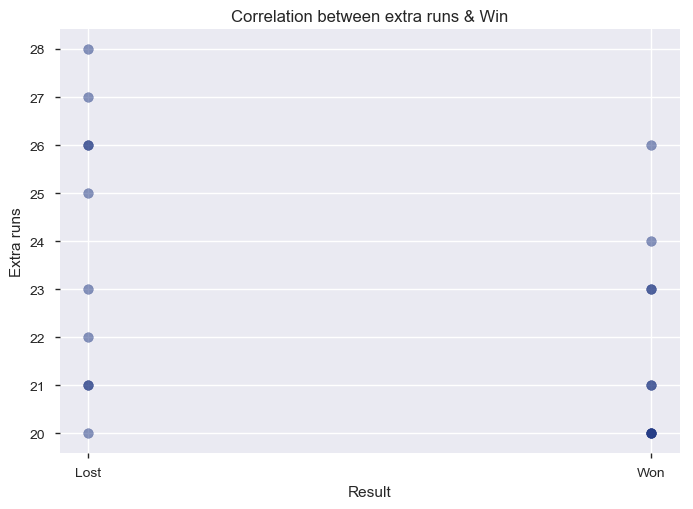

In [26]:
#Hypothesis2: Extra runs given by Fielding team is inversely proportional to Win
m_t_supres
extra_runs = ipl_deliveries.groupby(by=['match_id','inning']).agg({'extra_runs':'sum'}).reset_index()
extra_runs_sorted = extra_runs.sort_values(by='extra_runs',ascending=False)
extra_runs_sorted = extra_runs_sorted.head(20)

extra_runs_merged = extra_runs_sorted.merge(m_t_supres,how='left', left_on=['match_id','inning'], right_on=['match_id','inning_x'], indicator=True)
extra_runs_merged_grp = extra_runs_merged.groupby(by=['match_id','inning']).agg({'extra_runs':'max'}).reset_index()
extra_runs_merged_grp_merged = extra_runs_merged_grp.merge(extra_runs_merged,how='left', left_on=['match_id','inning','extra_runs'], right_on=['match_id','inning_x','extra_runs'])

# Plot
colors = (0.1, 0.2, 0.5)
# reaplce winner_x for 0 with Win and 1 with Lost as trend is seen from bowling team perspective
extra_runs_merged_grp_merged['winner_x']= extra_runs_merged_grp_merged.apply(lambda x: 'Won' if x['winner_x'] ==0 else 'Lost', axis=1)
plt.scatter(extra_runs_merged_grp_merged['winner_x'], extra_runs_merged_grp_merged['extra_runs'], c=colors, alpha=0.5)
plt.title('Correlation between extra runs & Win')
plt.xlabel('Result')
plt.ylabel('Extra runs')
plt.show()


#Hypothesis2: Extra runs given by Fielding team is inversely proportional to Win
It is evident from the above chart that higher the extra runs given, more are the chances of loosing match with very few exceptions. The extra runs gives the boost to the opponent team and they become mentally stronger to overcome the pressure.

Conclusion:
    The sample used in this EDA excercise was of considerable size and was sufficient to clearly conclude on below aspects:
    Bowling Dimension
◾ Harbhajan and Piyush have bowled the max overs and Malinga has been the most successful bowler.
Malinga has the best bowling average followed by Bravo and Narine.
◾ Zahir Khan and Kulkarni are the top successful opening bowlers wheareas Bravo, Malinga and B Kumar are most successful death bowlers.

Batting Dimension
◾ Raina is the highest runs scorer folowed by Kohli and Rohit.
◾ Gayle, Dhoni & Warner are very consistent batsmen with batting average above 40 runs.
◾ AB and Kohli had a top two biggest partnership of 229 and 215 runs. Kohli featured in 3 of the top 4 partnerships. AB and Gayle were part of two partnerships each in top 10.
◾ Rohit, Dhoni, Karthik and Raina have been involved in highest number of runouts and need to improve their running between the wickets.

Team Dimension
◾ Mumbai Indian has won 100 matches out of 164 played followed by CSK and KKR. But winning percentage of CSK is 61% which is better than MI winning percent of 58%. SRH also has 60% winning percent but they have played less number of matches.
◾ CSK, SRH, DCH & PW are better setting targets than chasing
◾ RR, KTK, KKR, RPS, RCB & KXIP performs better chasing targets
◾ MI, GL & DD performs same batting first or chasing targets
◾ The data shows most of the runs are scored in last overs. The average runs scored in last 5 overs is relatively higher than other overs. It is also observed that more runs are scored in 4th, 5th and 6th over as the field restrictions are still on and batsman is set after playing first three overs.

◾ The hypothesis 'Team batting first scoring >95runs in first 10 overs has high probability of winning matches' is true. The data exploration clearly shows the winning chances of Team batting first and scoring more than 100 runs in first 10 overs have 86% chances of winning and the teams scoring between 95 and 100 have 65% chances of winning. So higher you score in first 10 overs, more are the chances of winning.

◾ The other hypothesis 'Extra runs given by Fielding team is inversely proportional to Win' stood true. It is evident from the above chart that higher the extra runs given, more are the chances of loosing match with very few exceptions. The extra runs gives the boost to the opponent team and they become mentally stronger to overcome the pressure.
